# 1. 파일불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False  # minus 표시
plt.rc('font', family='Malgun Gothic')

In [4]:
file_path = './resources/완_기간별_ordered_180101_to_230509_ver3.csv'
mv_2018 = pd.read_csv(file_path)
print(mv_2018.columns)
mv_2018.head()

Index(['순위', '영화명', '개봉일', '대표국적', '국적', '제작사', '배급사', '등급', '장르', '감독', '배우',
       '기준일', '매출액', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수', '기준연도', '기준월',
       '개봉연도', '개봉월'],
      dtype='object')


,순위,영화명,개봉일,대표국적,국적,제작사,배급사,등급,장르,감독,...,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,기준연도,기준월,개봉연도,개봉월
0,1,신과함께-죄와 벌,2017-12-20,한국,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"판타지,드라마",김용화,...,7715149100,76065645532,916652,9456147,1644,7957,2018,1,2017,12
1,2,1987,2017-12-27,한국,한국,(주)우정필름,(주)씨제이이엔엠,15세이상관람가,드라마,장준환,...,4460462100,19714466137,531469,2473546,1097,4982,2018,1,2017,12
2,4,강철비,2017-12-14,한국,한국,"(주)와이웍스엔터테인먼트,(주)브이에이스튜디오",(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"액션,드라마",양우석,...,944228600,32939126166,114298,4128591,602,1451,2018,1,2017,12
3,5,위대한 쇼맨,2017-12-20,미국,미국,NaN,"월트디즈니컴퍼니코리아 유한책임회사,이십세기폭스코리아(주)",12세이상관람가,"드라마,뮤지컬",마이클 그레이시,...,509947700,7166974900,60070,874655,432,843,2018,1,2017,12
4,7,극장판 포켓몬스터 너로 정했다!,2017-12-21,일본,일본,NaN,(주)이수C&E,전체관람가,"애니메이션,어드벤처,가족",유야마 쿠니히코,...,262886500,3380416200,34103,449358,417,605,2018,1,2017,12


In [6]:
file_path2 = './resources/(완)역대_박스오피스(2023.05.11).xlsx'
mv_top200 = pd.read_excel(file_path2)
print(mv_top200.columns)
mv_top200

Index(['순위', '영화명', '개봉일', '매출액', '관객수', '스크린수', '상영횟수', '대표국적', '국적', '배급사'], dtype='object')


,순위,영화명,개봉일,매출액,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,명량,2014-07-30,135758658810,17615919,1587,188726,한국,한국,(주)씨제이이엔엠
1,2,극한직업,2019-01-23,139655543516,16266338,2003,292816,한국,한국,(주)씨제이이엔엠
2,3,신과함께-죄와 벌,2017-12-20,115727528087,14414658,1912,214631,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
3,4,국제시장,2014-12-17,110947621230,14264478,1044,212705,한국,한국,(주)씨제이이엔엠
4,5,어벤져스: 엔드게임,2019-04-24,122492181020,13977602,2835,246433,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
...,...,...,...,...,...,...,...,...,...,...
195,196,해리 포터와 불의 잔,2005-12-01,22097731900,3499257,504,45555,미국,미국,워너브러더스 코리아(주)
196,197,비긴 어게인,2014-08-13,27433947031,3479444,525,87565,미국,미국,판씨네마(주)
197,198,태풍,2005-12-14,22209675300,3471150,481,47155,한국,한국,CJ ENM
198,199,킹콩,2005-12-14,21476688172,3470059,319,38456,미국,미국,UIP코리아


In [11]:
mv_top200_country = mv_top200.groupby('대표국적')['영화명'].count().reset_index(name='영화별대표국적수')
mv_top200_country = mv_top200_country.sort_values(by='영화별대표국적수', ascending=False)
mv_top200_country

,대표국적,영화별대표국적수
2,한국,114
0,미국,83
1,일본,3


In [12]:
file_path3 = './resources/완_역대박스오피스_230511_감독.xlsx'
mv_top61_director = pd.read_excel(file_path3)
print(mv_top61_director.columns)
mv_top61_director

Index(['순위', '영화명', '개봉일', '매출액', '관객수', '스크린수', '상영횟수', '대표국적', '국적', '배급사',
       '감독'],
      dtype='object')


,순위,영화명,개봉일,매출액,관객수,스크린수,상영횟수,대표국적,국적,배급사,감독
0,1,명량,2014-07-30,135758658810,17615919,1587,188726,한국,한국,(주)씨제이이엔엠,김한민
1,2,극한직업,2019-01-23,139655543516,16266338,2003,292816,한국,한국,(주)씨제이이엔엠,이병헌
2,3,신과함께-죄와 벌,2017-12-20,115727528087,14414658,1912,214631,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,김용화
3,4,국제시장,2014-12-17,110947621230,14264478,1044,212705,한국,한국,(주)씨제이이엔엠,윤제균
4,5,어벤져스: 엔드게임,2019-04-24,122492181020,13977602,2835,246433,미국,미국,월트디즈니컴퍼니코리아 유한책임회사,루소 형제
...,...,...,...,...,...,...,...,...,...,...,...
56,57,마스터,2016-12-21,58068236865,7150586,1501,126927,한국,한국,(주)씨제이이엔엠,조의석
57,58,터널,2016-08-10,57530028417,7120780,1105,113214,한국,한국,(주)쇼박스,김성훈
58,59,어벤져스,2012-04-26,59644552758,7087971,967,112559,미국,미국,"월트디즈니컴퍼니코리아 유한책임회사,한국소니픽쳐스릴리징브에나비스타영화㈜",조스 휘던
59,60,내부자들,2015-11-19,56605193557,7073581,1129,152783,한국,한국,(주)쇼박스,우민호


# 2. 영화별 감독

In [22]:
mv_top61_dir = mv_top61_director.groupby(['감독'])['영화명'].count().reset_index(name='감독별영화수')
mv_top61_dir = mv_top61_dir.sort_values(by='감독별영화수', ascending=False)
mv_top61_dir

,감독,감독별영화수
8,마이클 베이,3
9,봉준호,3
34,존 와츠,3
3,김용화,3
5,김한민,3
6,루소 형제,3
35,최동훈,2
31,조스 휘던,2
1,강형철,2
21,이석훈,2


In [23]:
mv_top61_dir2 = mv_top61_dir[:]
mv_top61_dir2.set_index('감독', inplace = True)
mv_top61_dir2

,감독별영화수
감독,
마이클 베이,3
봉준호,3
존 와츠,3
김용화,3
김한민,3
루소 형제,3
최동훈,2
조스 휘던,2
강형철,2


> 역대 TOP61 영화 감독 비율

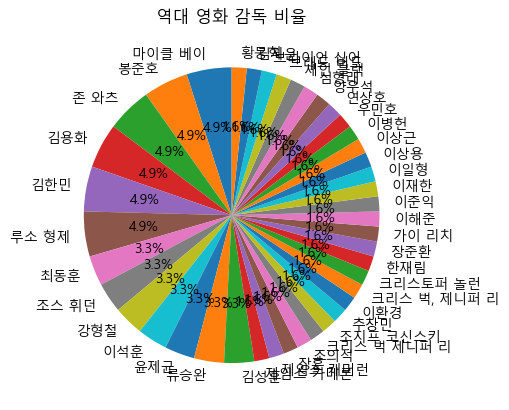

In [24]:
mv_top61_dir2.plot(kind='pie', y='감독별영화수', legend=False,  autopct='%1.1f%%', startangle=90)
plt.title('역대 영화 감독 비율')
plt.ylabel('')
plt.show()

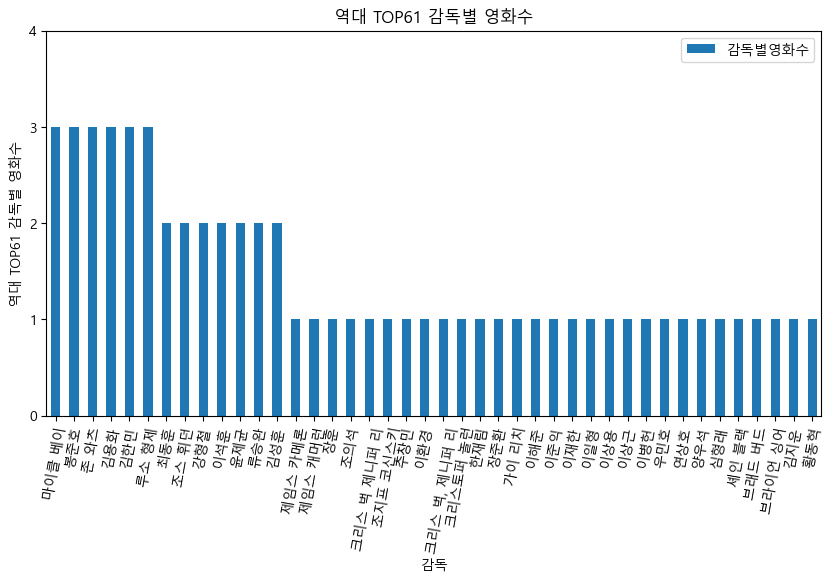

In [34]:
mv_top61_dir3 = mv_top61_dir[:]
mv_top61_dir3.plot.bar(x='감독', y='감독별영화수', rot=80, figsize=(10, 5), fontsize=10)
plt.title('역대 TOP61 감독별 영화수')
plt.ylabel('역대 TOP61 감독별 영화수')
plt.yticks(np.arange(0, 5))
plt.show()

> 역대 TOP61 영화 감독 첫글자( like 성씨 )

In [21]:
mv_top61_dir_firstStr = mv_top61_dir[:]
mv_top61_dir_firstStr['감독첫글자'] = mv_top61_dir_firstStr.index.str[:1]
mv_top61_dir_firstStr

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1940\2423466833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_top61_dir_firstStr['감독첫글자'] = mv_top61_dir_firstStr.index.str[:1]


,감독별영화수,감독첫글자
감독,,
마이클 베이,3,마
봉준호,3,봉
존 와츠,3,존
김용화,3,김
김한민,3,김
루소 형제,3,루
최동훈,2,최
조스 휘던,2,조
강형철,2,강


In [29]:
mv_top61_dir_firstStr_cnt = mv_top61_dir_firstStr.groupby('감독첫글자')['감독별영화수'].sum().reset_index(name='감독첫글자_영화수')
mv_top61_dir_firstStr_cnt = mv_top61_dir_firstStr_cnt.sort_values(by='감독첫글자_영화수', ascending=False)
mv_top61_dir_firstStr_cnt.head(3)

,감독첫글자,감독첫글자_영화수
14,이,10
2,김,9
17,조,4


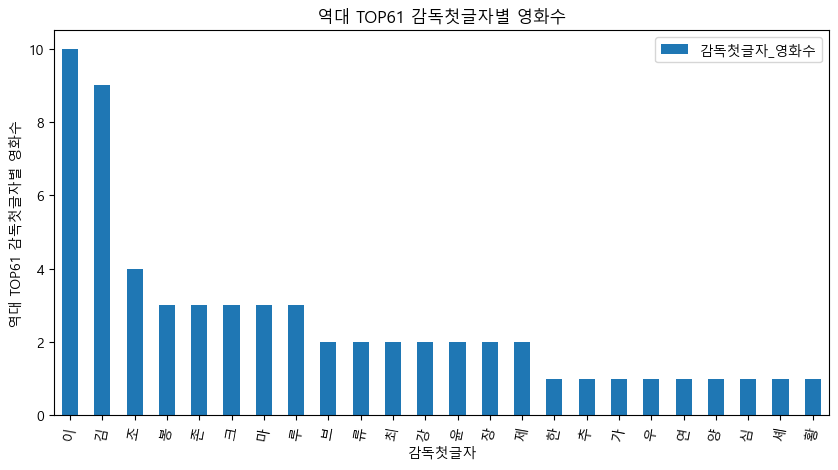

In [33]:
mv_top61_dir3_graph = mv_top61_dir_firstStr_cnt[:]
mv_top61_dir3_graph.plot.bar(x='감독첫글자', y='감독첫글자_영화수', rot=80, figsize=(10, 5), fontsize=10)
plt.title('역대 TOP61 감독첫글자별 영화수')
plt.ylabel('역대 TOP61 감독첫글자별 영화수')
plt.show()

# 3. 역대 영화 국적

In [36]:
mv_top200_country = mv_top200.groupby('대표국적')['영화명'].count().reset_index(name='영화별대표국적수')
mv_top200_country = mv_top200_country.sort_values(by='영화별대표국적수', ascending=False)
mv_top200_country

,대표국적,영화별대표국적수
2,한국,114
0,미국,83
1,일본,3


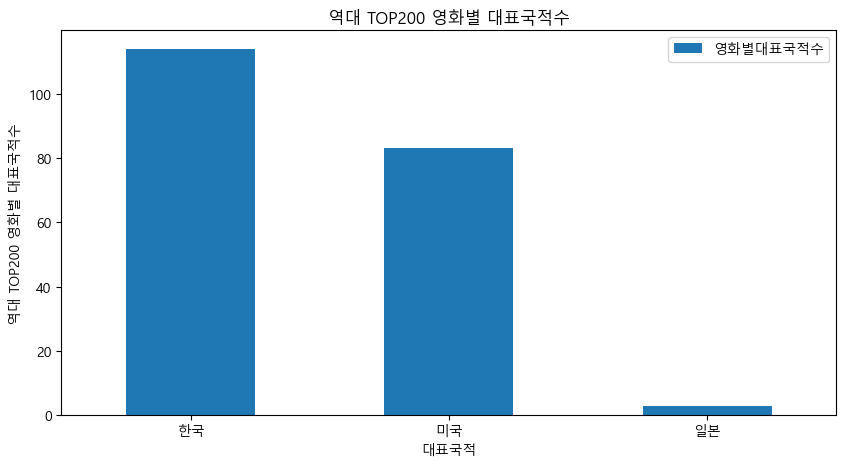

In [39]:
mv_top200_country.plot.bar(x='대표국적', y='영화별대표국적수', rot=0, figsize=(10, 5), fontsize=10)
plt.title('역대 TOP200 영화별 대표국적수')
plt.ylabel('역대 TOP200 영화별 대표국적수')
plt.show()